# Youtube Adview Prediction

In [258]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## EDA

In [259]:
df=pd.read_csv('train.csv')
df.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


In [260]:
df.shape

(14999, 9)

In [261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   vidid      14999 non-null  object
 1   adview     14999 non-null  int64 
 2   views      14999 non-null  object
 3   likes      14999 non-null  object
 4   dislikes   14999 non-null  object
 5   comment    14999 non-null  object
 6   published  14999 non-null  object
 7   duration   14999 non-null  object
 8   category   14999 non-null  object
dtypes: int64(1), object(8)
memory usage: 1.0+ MB


Removing F values from dataset

In [262]:
df=df[df.views!='F']
df=df[df.likes!='F']
df=df[df.dislikes!='F']
df=df[df.comment!='F']

Converting them to numeric

In [263]:
df['views']=pd.to_numeric(df['views'])
df['likes']=pd.to_numeric(df['likes'])
df['dislikes']=pd.to_numeric(df['dislikes'])
df['comment']=pd.to_numeric(df['comment'])
df['published']=pd.to_datetime(df['published'])

In [264]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14637 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   vidid      14637 non-null  object        
 1   adview     14637 non-null  int64         
 2   views      14637 non-null  int64         
 3   likes      14637 non-null  int64         
 4   dislikes   14637 non-null  int64         
 5   comment    14637 non-null  int64         
 6   published  14637 non-null  datetime64[ns]
 7   duration   14637 non-null  object        
 8   category   14637 non-null  object        
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 1.1+ MB


In [265]:
df.isnull().sum()

vidid        0
adview       0
views        0
likes        0
dislikes     0
comment      0
published    0
duration     0
category     0
dtype: int64

In [266]:
df.nunique()

vidid        14637
adview         973
views        14247
likes         4762
dislikes      1521
comment       2002
published     2384
duration      3078
category         8
dtype: int64

In [267]:
vidid_col=df['vidid']
vidid_col

0        VID_18655
1        VID_14135
2         VID_2187
3        VID_23096
4        VID_10175
           ...    
14994       VID_31
14995     VID_5861
14996      VID_805
14997    VID_19843
14998     VID_8534
Name: vidid, Length: 14637, dtype: object

## Label Encoding

In [268]:
from sklearn.preprocessing import LabelEncoder

df['category']=LabelEncoder().fit_transform(df['category']).astype('int64')
df['vidid']=LabelEncoder().fit_transform(df['vidid']).astype('int64')

In [269]:
df.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2016-09-14,PT7M37S,5
1,2741,2,1707,56,2,6,2016-10-01,PT9M30S,3
2,8138,1,2023,25,0,2,2016-07-02,PT2M16S,2
3,9005,6,620860,777,161,153,2016-07-27,PT4M22S,7
4,122,1,666,1,0,0,2016-06-29,PT31S,3


## Conveting duration to readable format

In [270]:
import time
import datetime

In [271]:
sample=df['duration'][0]
sample[2:]

'7M37S'

In [272]:
def check(x):
    y = x[2:]
    h = ''
    m = ''
    s = ''
    duration = ''
    P = ['H','M','S']
    for i in y:
        if i not in P:
            duration+=i
        else:
            if(i=="H"):
                h = duration
                duration = ''
            elif(i == "M"):
                m = duration
                duration = ''
            else:
                s = duration
                duration = ''
                
    if(h==''):
        h = '00'
    if(m == ''):
        m = '00'
    if(s==''):
        s='00'
    
    bp = h+':'+m+':'+s
    return bp

In [273]:
a='PT7M37S'
print(check(a))

00:7:37


In [274]:
train=pd.read_csv("train.csv")
mp = pd.read_csv("train.csv")["duration"]
print(mp)
time = mp.apply(check)
print(time)

0        PT7M37S
1        PT9M30S
2        PT2M16S
3        PT4M22S
4          PT31S
          ...   
14994    PT6M10S
14995    PT3M56S
14996    PT3M13S
14997      PT26S
14998     PT1M1S
Name: duration, Length: 14999, dtype: object
0         00:7:37
1         00:9:30
2         00:2:16
3         00:4:22
4        00:00:31
           ...   
14994     00:6:10
14995     00:3:56
14996     00:3:13
14997    00:00:26
14998      00:1:1
Name: duration, Length: 14999, dtype: object


In [275]:
def func_sec(time_string):
    h, m, s = time_string.split(':')
    return int(h) * 3600 + int(m) * 60 + int(s)

time1=time.apply(func_sec)

In [276]:
df['duration']=time1
df.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2016-09-14,457,5
1,2741,2,1707,56,2,6,2016-10-01,570,3
2,8138,1,2023,25,0,2,2016-07-02,136,2
3,9005,6,620860,777,161,153,2016-07-27,262,7
4,122,1,666,1,0,0,2016-06-29,31,3


In [277]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14637 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   vidid      14637 non-null  int64         
 1   adview     14637 non-null  int64         
 2   views      14637 non-null  int64         
 3   likes      14637 non-null  int64         
 4   dislikes   14637 non-null  int64         
 5   comment    14637 non-null  int64         
 6   published  14637 non-null  datetime64[ns]
 7   duration   14637 non-null  int64         
 8   category   14637 non-null  int64         
dtypes: datetime64[ns](1), int64(8)
memory usage: 1.6 MB


## Visualization

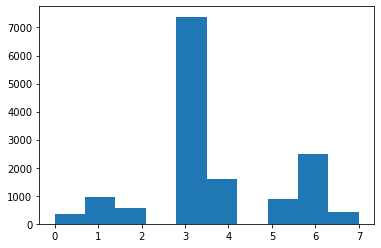

In [281]:
plt.hist(df['category'])
plt.show()

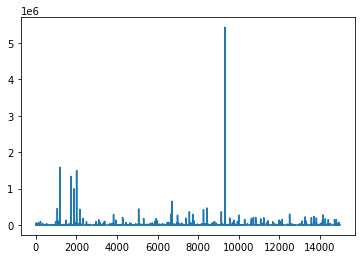

In [282]:
plt.plot(df['adview'])
plt.show()

Removing outlier

In [283]:
df=df[df.adview<2000000]

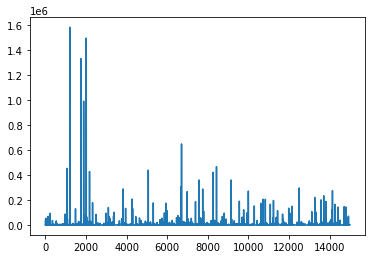

In [284]:
plt.plot(df['adview'])
plt.show()

<AxesSubplot:>

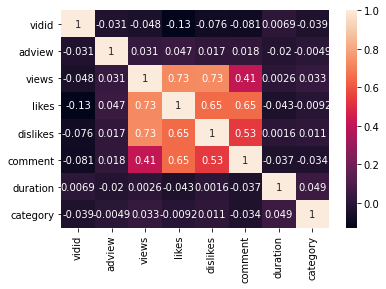

In [286]:
corr=df.corr()
sns.heatmap(corr,mask=np.zeros_like(corr,dtype=np.bool),annot=True)